## Introduction

Cardiovascular disease (CVD) remains a leading cause of global morbidity and mortality, emphasizing the need for effective preventive strategies. In recent years, machine learning (ML) has emerged as a powerful tool in the healthcare domain, offering innovative approaches to predict and manage cardiovascular risk. ML leverages advanced algorithms to analyze complex datasets, uncover patterns, and generate predictive models, thereby augmenting traditional risk assessment methods.

**Key Components of Machine Learning in Cardiovascular Disease Prediction:**

1. **Data Utilization:**
   - ML algorithms thrive on diverse and comprehensive datasets. Patient information, including demographics, medical history, lifestyle factors, and biomarkers, is fed into ML models to identify subtle relationships and patterns that might elude conventional analysis.

2. **Feature Selection:**
   - ML models automatically identify relevant features or variables that contribute significantly to the prediction of cardiovascular events. This aids in optimizing the model's performance and simplifies the interpretation of results.

3. **Algorithm Selection:**
   - Various ML algorithms, such as decision trees, random forests, support vector machines, and neural networks, are applied to cardiovascular datasets. The choice of algorithm depends on the nature and size of the dataset, as well as the specific objectives of the prediction task.

4. **Model Training and Validation:**
   - ML models undergo a training process where they learn from historical data to make predictions. Rigorous validation is essential to ensure the model's generalizability and robustness when applied to new, unseen data.

5. **Risk Stratification:**
   - ML contributes to personalized risk stratification by identifying individuals at higher risk of cardiovascular events. This enables healthcare professionals to tailor preventive interventions and allocate resources more efficiently.

6. **Early Detection:**
   - ML models excel in recognizing subtle patterns that may precede clinical manifestations of cardiovascular disease. Early detection allows for timely intervention and the implementation of preventive measures to mitigate the risk.

7. **Continuous Learning:**
   - ML models can adapt and improve over time as more data becomes available. Continuous learning ensures that predictive models stay relevant and accurate in dynamic healthcare environments.

**Challenges and Considerations:**

1. **Data Quality and Bias:**
   - The accuracy of ML predictions heavily relies on the quality and representativeness of the training data. Biases in the data, such as underrepresentation of certain demographic groups, can affect model performance.

2. **Interpretability:**
   - Some ML models, particularly complex ones like deep neural networks, are considered "black boxes," making it challenging to interpret how they arrive at specific predictions. Interpretable ML models are crucial for gaining the trust of healthcare professionals and patients.

3. **Ethical and Privacy Concerns:**
   - ML applications in healthcare must navigate ethical considerations related to patient privacy, consent, and the responsible use of sensitive health data. Adhering to stringent ethical guidelines is essential to foster trust in the adoption of ML-based predictive models.

In conclusion, machine learning holds significant promise in revolutionizing cardiovascular risk prediction. By leveraging the power of advanced algorithms and comprehensive datasets, ML contributes to more accurate, timely, and personalized assessments of cardiovascular risk, ultimately shaping the future of preventive cardiology.

### Data and Methods
This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, data.csv, with the following columns:

Person ID Gender Age Occupation Sleep Duration: Average number of hours of sleep per day Quality of Sleep: A subjective rating on a 1-10 scale Physical Activity Level: Average number of minutes the person engages in physical activity daily Stress Level: A subjective rating on a 1-10 scale BMI Category Blood Pressure: Indicated as systolic pressure over diastolic pressure Heart Rate: In beats per minute Daily Steps Sleep Disorder: One of None, Insomnia or Sleep Apnea Remarks on the data: The dataframe contains 374 rows and 13 columns, with no missing values or duplicate rows.Most of the numeric columns exhibit skewness,likely due to a significant number of outlier which totalled 15 .To prevent the loss of important information during analysis we retained these outliers.

#### Installing and importing libraries

In [1]:
import pandas as pd 
import mysql.connector as sql
import datasist as ds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## creating sql connection and connecting to database

In [2]:
#import data from SQL
conn = sql.connect(host= 'localhost' , 
                   user='root',
                   passwd='root',
                   use_pure=True,
                  database='cardio_data')
print(conn)

#### Read in file as dataframe

In [3]:
#read dataset as pandas dataframe
data = pd.read_sql_query('''SELECT * FROM cardio_data.cardio_data''', conn)

cardio_df = pd.DataFrame(data)
cardio_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_2412\3358142953.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('''SELECT * FROM cardio_data.cardio_data''', conn)


,id,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
0,0,18393,2,168,62,110,80,normal,normal,0,no,yes,0
1,1,20228,1,156,85,140,90,very high,normal,0,no,yes,1
2,2,18857,1,165,64,130,70,very high,normal,0,no,no,1
3,3,17623,2,169,82,150,100,normal,normal,0,no,yes,1
4,4,17474,1,156,56,100,60,normal,normal,0,no,no,0


#### Data cleaning

In [4]:
#checking for missing values

cardio_df.isna().sum()

#cleaning data columns

cardio_df['Gender'] = cardio_df['Gender'].replace({1:'Male', 2:'Female'})
cardio_df['Smoke'] = cardio_df['Smoke'].replace({0:'No', 1:'Yes'})
cardio_df['CVD'] = cardio_df['CVD'].replace({0:'No', 1:'Yes'})


cardio_df['Age'] = np.round(cardio_df['Age'] / 365).astype('int')
cardio_df = cardio_df.drop(['id'], axis=1)

#check for negative values in systolic and diastolic columns and convert to positive values
cardio_df['Systolic'] = cardio_df['Systolic'].astype('str')
cardio_df['Systolic'] = cardio_df['Systolic'].str.strip('-')
cardio_df['Systolic'] = cardio_df['Systolic'].astype('int')

cardio_df['Diastolic'] = cardio_df['Diastolic'].astype('str')
cardio_df['Diastolic'] = cardio_df['Diastolic'].str.strip('-')
cardio_df['Diastolic'] = cardio_df['Diastolic'].astype('int')

#handling outliers
cardio_df['Systolic'] = cardio_df['Systolic'].apply(lambda x: 200 if x > 200 else x)
cardio_df[cardio_df['Systolic'] > 200]
cardio_df['Systolic'] = cardio_df['Systolic'].apply(lambda x: 60 if x < 60 else x)
cardio_df[cardio_df['Systolic'] < 60]


cardio_df['Diastolic'] = cardio_df['Diastolic'].apply(lambda x: 50 if x < 50 else x)
cardio_df[cardio_df['Diastolic'] < 50]
cardio_df['Diastolic'] = cardio_df['Diastolic'].apply(lambda x: 180 if x > 180 else x)
cardio_df[cardio_df['Diastolic'] > 180]

cardio_df.head()

,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
0,50,Female,168,62,110,80,normal,normal,No,no,yes,No
1,55,Male,156,85,140,90,very high,normal,No,no,yes,Yes
2,52,Male,165,64,130,70,very high,normal,No,no,no,Yes
3,48,Female,169,82,150,100,normal,normal,No,no,yes,Yes
4,48,Male,156,56,100,60,normal,normal,No,no,no,No


#### Exploratory Data Analysis using Datasist Library

In [6]:
#Random five data points

cardio_df.sample(n=5)

,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
19809,60,Female,167,64,120,80,normal,normal,No,no,yes,No
14280,40,Female,171,78,120,80,normal,normal,No,no,yes,No
9881,55,Female,177,82,170,80,normal,normal,No,no,no,Yes
39936,40,Female,172,69,120,80,normal,normal,No,no,no,No
25283,58,Female,175,80,120,80,normal,high,No,no,no,Yes


In [10]:
#Shape of  data 
print("shape of data :", cardio_df.shape)

#Size of  data set
print("size of dataset :", cardio_df.size)

shape of data : (70000, 12)
size of dataset : 840000


In [11]:
#Data Types
cardio_df.dtypes

Age                   int32
Gender               object
Height                int64
Weight                int64
Systolic              int64
Diastolic             int64
Cholesterol          object
Glucose              object
Smoke                object
Alcohol              object
Physical_Activity    object
CVD                  object
dtype: object

In [12]:
#Statistical Description of categorical Columns
cardio_df.describe()

,Age,Height,Weight,Systolic,Diastolic
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.206214,126.854386,82.703229
std,6.765294,8.210126,14.395817,17.419102,14.960110
min,30.000000,55.000000,10.000000,60.000000,50.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,200.000000,180.000000


In [13]:
#statistical description of numerical columns
cardio_df.describe(exclude=[np.number])

,Gender,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
count,70000,70000,70000,70000,70000,70000,70000
unique,2,3,3,2,2,2,2
top,Male,normal,normal,No,no,yes,No
freq,45530,52385,59479,63831,66236,56261,35021


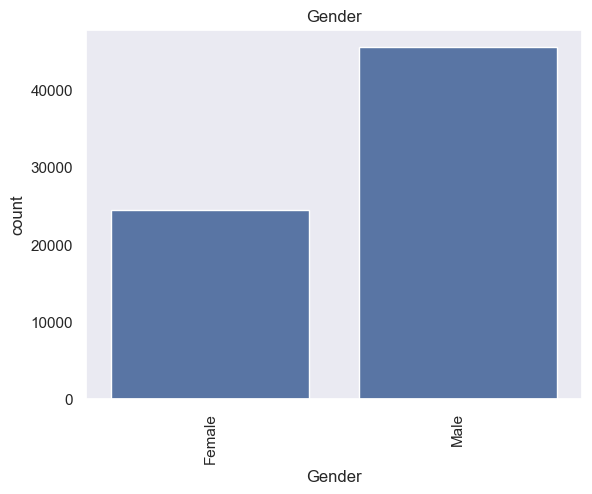

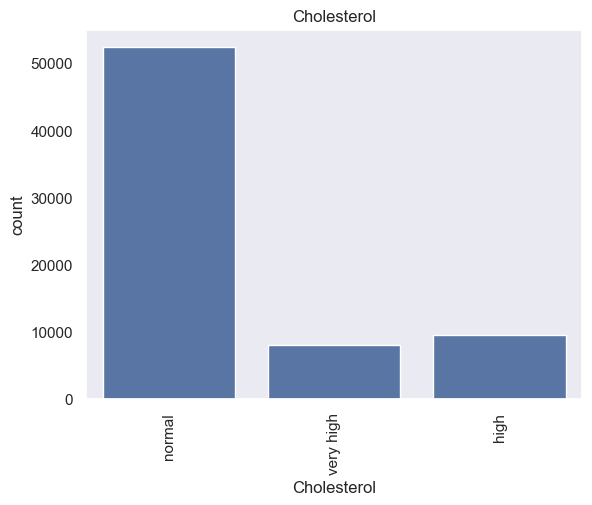

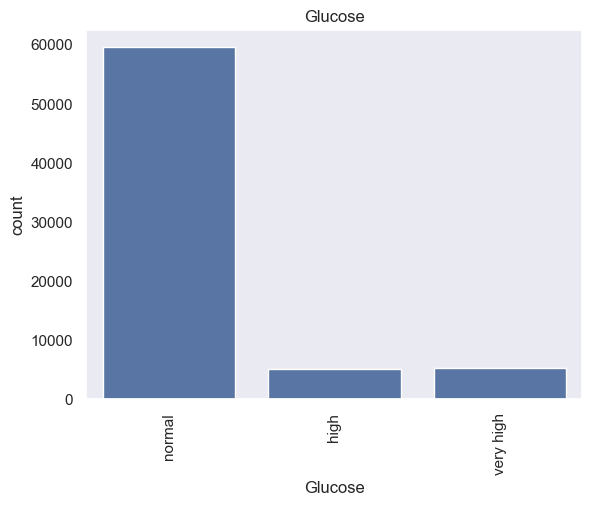

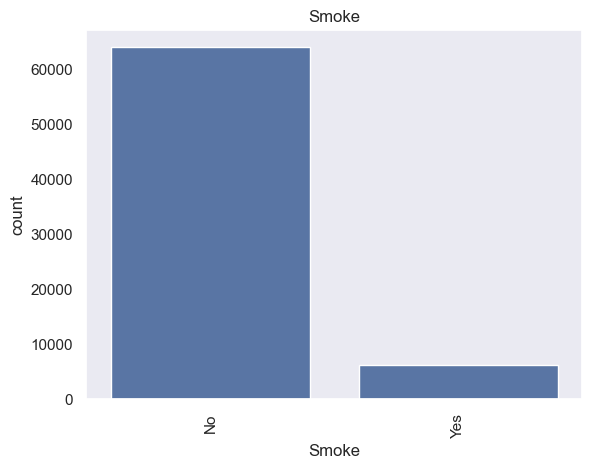

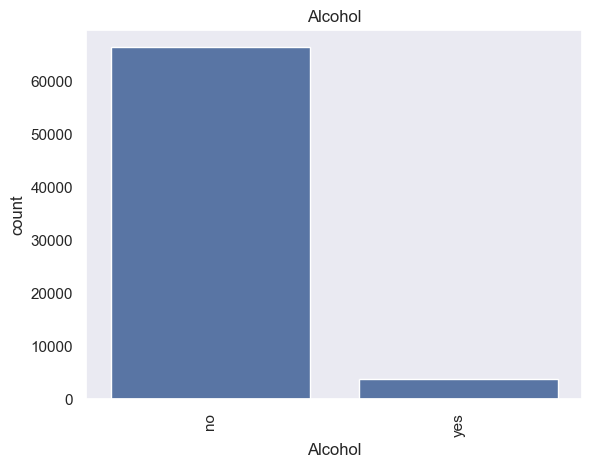

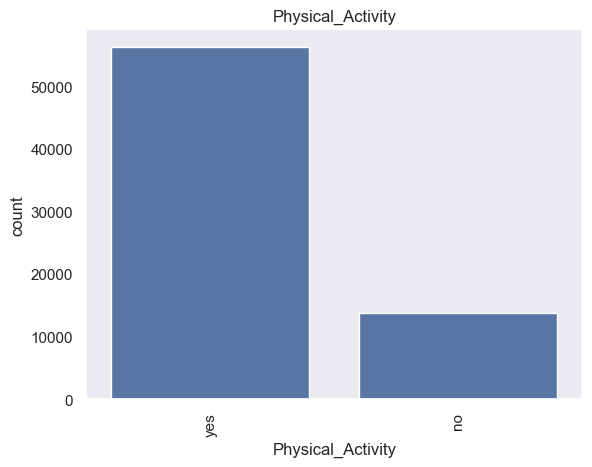

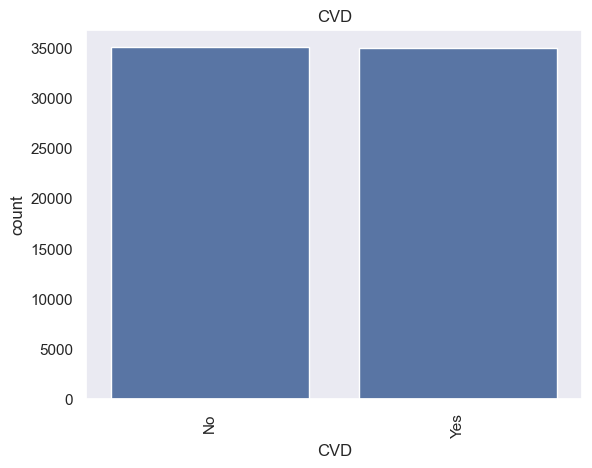

In [15]:
#data visualization
columns = ['Gender','Cholesterol','Glucose',
           'Smoke','Alcohol','Physical_Activity','CVD']

sns.set(style='dark',font_scale=1)
#sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=cardio_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

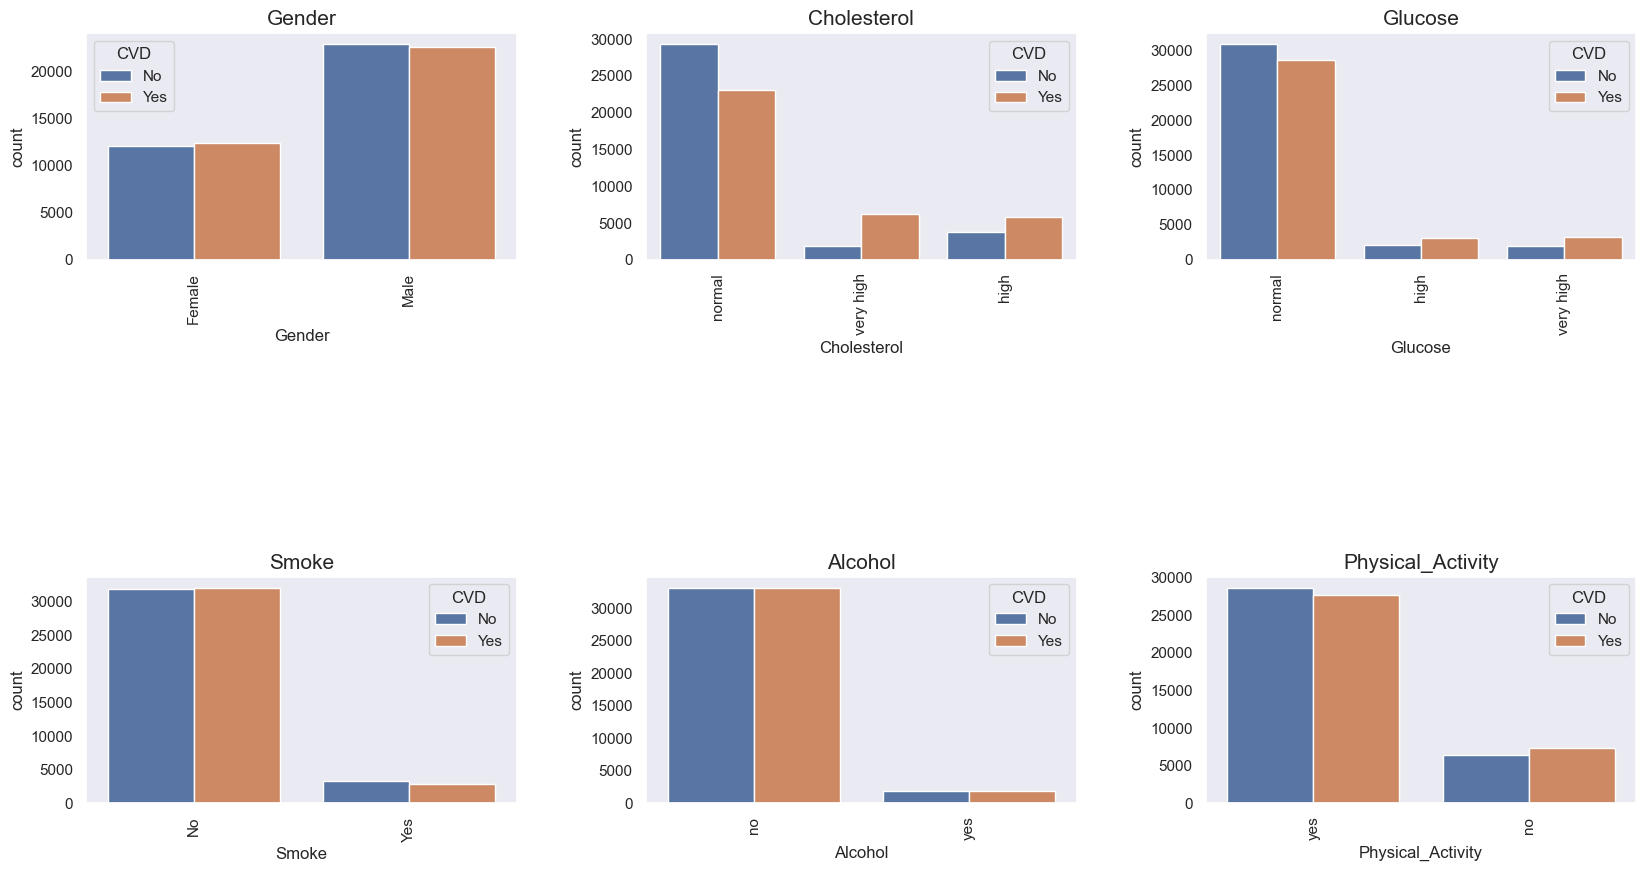

In [18]:
#visualize the information above for easy understanding
#value counting the categorical columns

cols = ['Gender','Cholesterol','Glucose',
           'Smoke','Alcohol','Physical_Activity']
# plot data distribution
fig, axs = plt.subplots(2,3, figsize=(20, 10))
axs = axs.flatten()
#sns.set_style('white')
#sns.set_palette("PuRd")

for i, var in enumerate(cols):
    sns.countplot(x=var, ax=axs[i], data=cardio_df, hue='CVD')
    axs[i].set_title(var, fontsize=15)
    axs[i].tick_params(axis='x', labelrotation=90)
    
plt.subplots_adjust(hspace=1.4, wspace=0.3)
plt.show()


#### Feature Engineering

Feature Engineering is the process of using domain knowledge to select and transform feature from raw data before building a predictive model using machine learning.

In [19]:
#print all column name 
cardio_df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Systolic', 'Diastolic',
       'Cholesterol', 'Glucose', 'Smoke', 'Alcohol', 'Physical_Activity',
       'CVD'],
      dtype='object')

In [20]:
#preprocessing data for modelling
cardio_data = pd.get_dummies(cardio_df, drop_first=True)

In [36]:
cardio_data.head()

,Age,Height,Weight,Systolic,Diastolic,Gender_Male,Cholesterol_normal,Cholesterol_very high,Glucose_normal,Glucose_very high,Smoke_Yes,Alcohol_yes,Physical_Activity_yes,CVD_Yes
0,50,168,62,110,80,0,1,0,1,0,0,0,1,0
1,55,156,85,140,90,1,0,1,1,0,0,0,1,1
2,52,165,64,130,70,1,0,1,1,0,0,0,0,1
3,48,169,82,150,100,0,1,0,1,0,0,0,1,1
4,48,156,56,100,60,1,1,0,1,0,0,0,0,0


In [21]:
cardio_data.dtypes

Age                      int32
Height                   int64
Weight                   int64
Systolic                 int64
Diastolic                int64
Gender_Male              uint8
Cholesterol_normal       uint8
Cholesterol_very high    uint8
Glucose_normal           uint8
Glucose_very high        uint8
Smoke_Yes                uint8
Alcohol_yes              uint8
Physical_Activity_yes    uint8
CVD_Yes                  uint8
dtype: object

In [22]:
#check for correlation to avoid overfitting of model
df = cardio_data.corr()
df[['CVD_Yes']].sort_values(by='CVD_Yes', ascending=False)

,CVD_Yes
CVD_Yes,1.000000
Systolic,0.419756
Diastolic,0.275681
Age,0.237749
Cholesterol_very high,0.191798
Weight,0.181671
Glucose_very high,0.070241
Alcohol_yes,-0.007330
Gender_Male,-0.008109
Height,-0.010821


<Axes: >

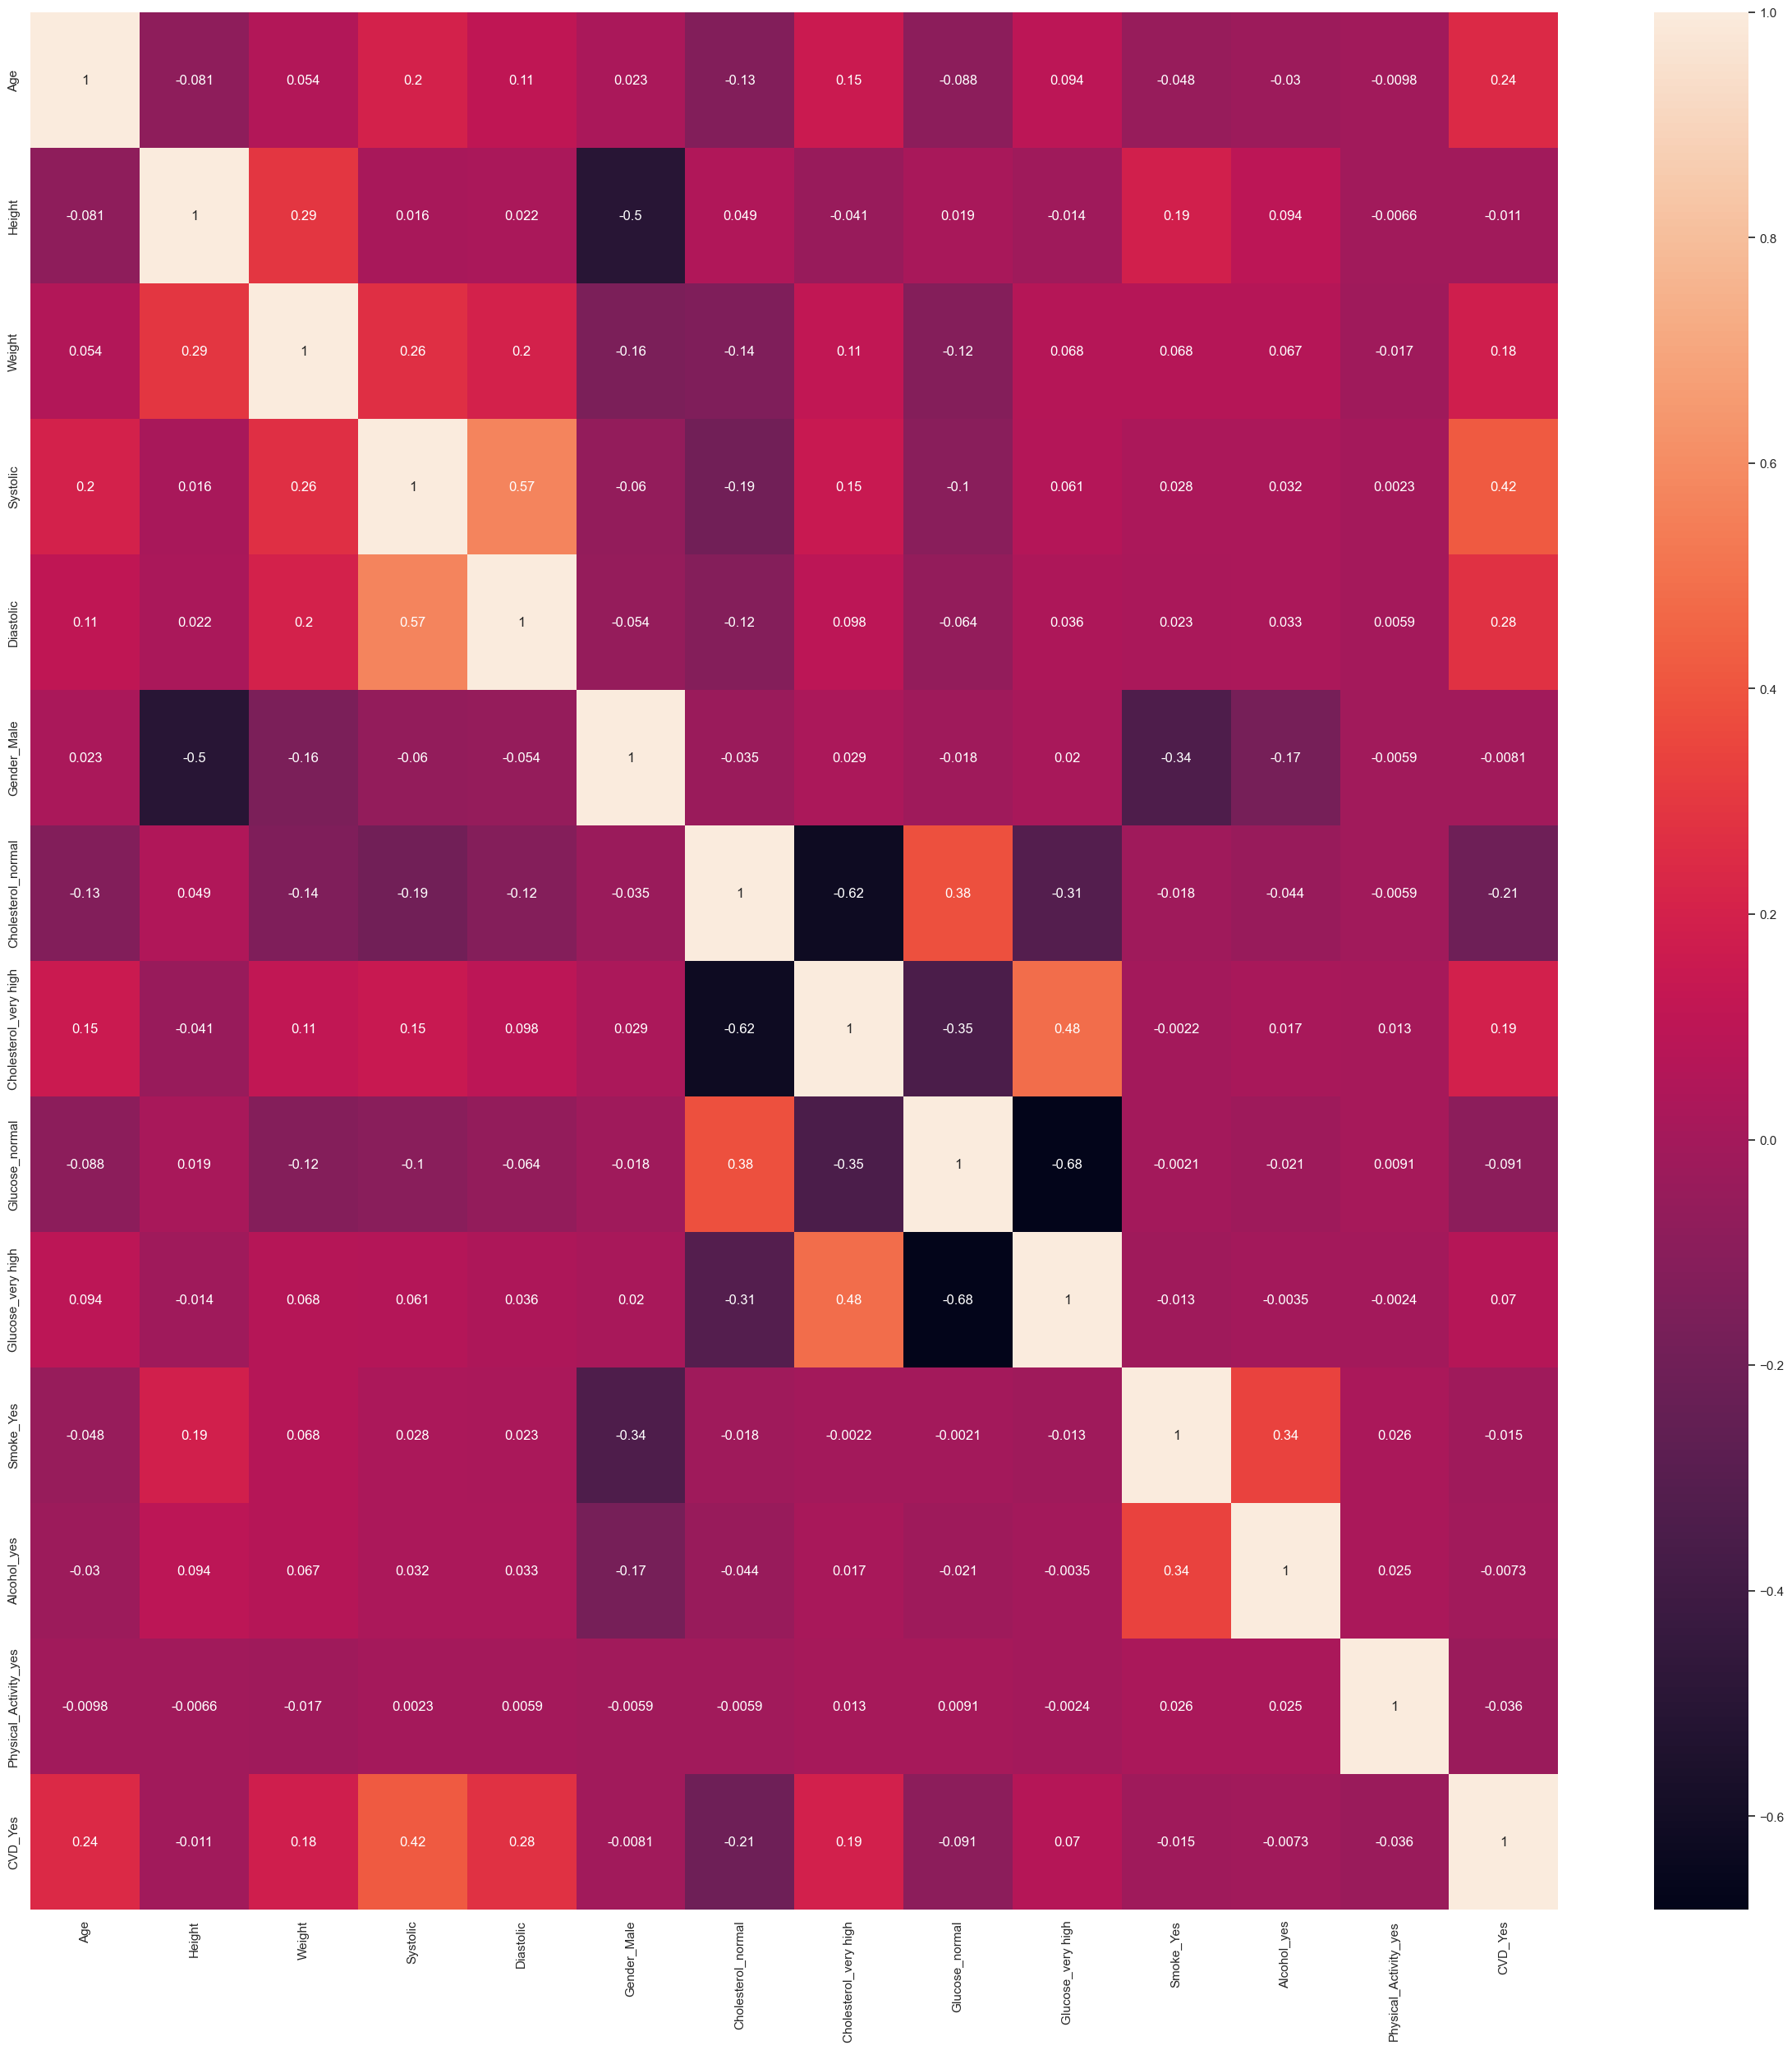

In [23]:
plt.rcParams['figure.figsize'] = [30,30]
sns.heatmap(cardio_data.corr(), annot=True)

## Modelling

In [24]:
#preprocessing categorical columns using pd get dummies
#dropping medical_specialty and 'readmitted'
X = cardio_data.drop(['CVD_Yes'], axis=1)
X = X.values

y = cardio_data['CVD_Yes'].values

print('X shape:', X.shape)

print('y shape:', y.shape)

X shape: (70000, 13)
y shape: (70000,)


In [25]:
#checking if the data is balance
cardio_data['CVD_Yes'].value_counts()

0    35021
1    34979
Name: CVD_Yes, dtype: int64

In [29]:
#!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score, accuracy_score

In [30]:
#train test split features and target varibales
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=23)

In [31]:
# Define the model
lgb_model = LGBMClassifier()

# Fit the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 24485, number of negative: 24515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499694 -> initscore=-0.001224
[LightGBM] [Info] Start training from score -0.001224


LGBMClassifier()

In [32]:
test_predictions = lgb_model.predict(X_test)
train_prediction = lgb_model.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.7505918367346939
Testing_accuracy_score : 0.7326190476190476
precision_score : 0.7520925906789294
recall_score : 0.6935391652372784


## visualize the top features for prediction

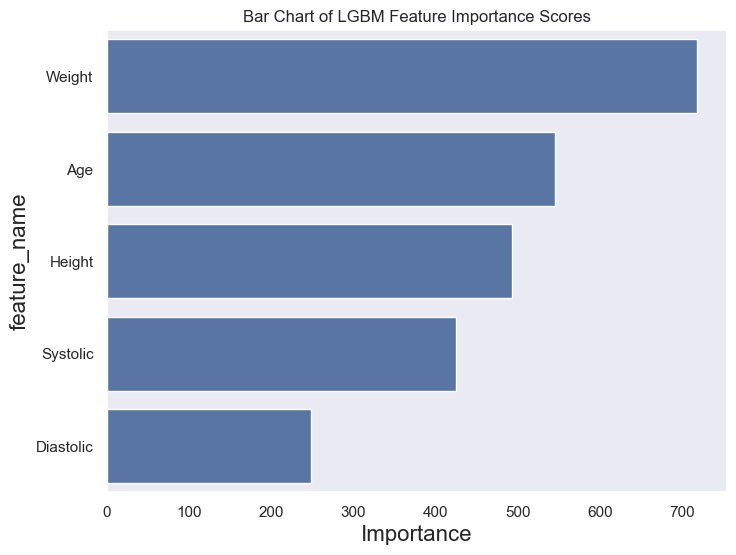

In [34]:
names = cardio_data.drop(['CVD_Yes'], axis=1).columns

# get importance
importance = lgb_model.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of LGBM Feature Importance Scores')
plt.show()

## create a pickle file

In [35]:
import pickle
file = open('LGBM_model.pkl','wb')
pickle.dump(lgb_model, file)
file.close()